#Data Diri

---


Nama : Rizka Nur Pratama

---


email : rzkprtma@students.unnes.ac.id

---


kota : Semarang, Jawa Tengah


---




In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [4]:
#download file melalui link dicoding yang telah diberikan
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-03-25 02:27:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.20MB/s    in 63s     

2021-03-25 02:28:12 (4.91 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
#tahap ekstraksi file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
#mengetahui isi dari file
os.listdir('/tmp/rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images', 'rock']

In [7]:
#menghitung keseluruhan file rock
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [8]:
#menghitung keseluruhan file scissors
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [9]:
#menghitung keseluruhan file paper
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [10]:
#membuat direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

#membuat direktori train dan direktori validations
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [11]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [12]:
#membagi direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

#membagi direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

#membagi direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [13]:

train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

#membuat if direktori baru untuk direktori train dan validation
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [14]:
#menyalin data dari direktori train dan val kedalam direktori baru "if"
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [15]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [16]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [17]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [18]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [19]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [20]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [21]:
#membuat data generator untuk image
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [23]:
#membuat model dengan keras
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [25]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 45s - loss: 1.1456 - accuracy: 0.3862 - val_loss: 0.8909 - val_accuracy: 0.6438
Epoch 2/20
25/25 - 44s - loss: 0.7787 - accuracy: 0.6612 - val_loss: 0.6212 - val_accuracy: 0.7437
Epoch 3/20
25/25 - 44s - loss: 0.5026 - accuracy: 0.8150 - val_loss: 0.4111 - val_accuracy: 0.8500
Epoch 4/20
25/25 - 44s - loss: 0.3208 - accuracy: 0.8925 - val_loss: 0.2980 - val_accuracy: 0.8813
Epoch 5/20
25/25 - 44s - loss: 0.2290 - accuracy: 0.9287 - val_loss: 0.3554 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 44s - loss: 0.2184 - accuracy: 0.9250 - val_loss: 0.1426 - val_accuracy: 0.9563
Epoch 7/20
25/25 - 44s - loss: 0.2142 - accuracy: 0.9312 - val_loss: 0.1832 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 44s - loss: 0.1916 - accuracy: 0.9312 - val_loss: 0.2010 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 44s - loss: 0.2098 - accuracy: 0.9275 - val_loss: 0.1997 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 44s - loss: 0.1929 - accuracy: 0.9350 - val_loss: 0.1302 - val_accuracy: 0.9688
Epoch 11/

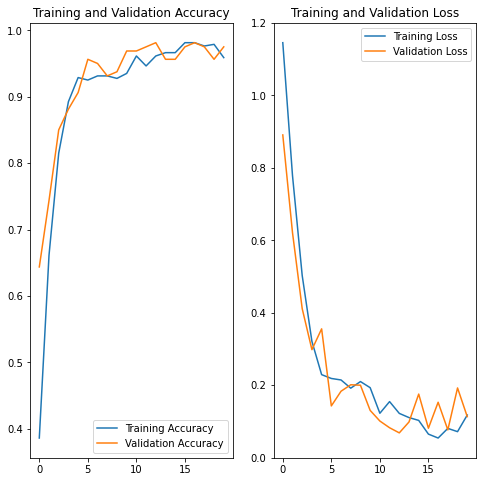

In [27]:
#memvisualisasikan hasil dari data training dengan plot accuraccy dan loss model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving Rizka Nur Pratama - Paper.jpeg to Rizka Nur Pratama - Paper.jpeg
Rizka Nur Pratama - Paper.jpeg
paper


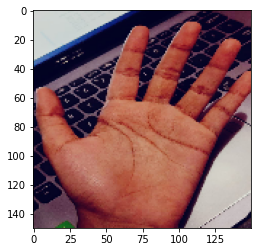

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')